In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set()
import os
import sklearn as sk

from sklearn import metrics
from scipy import stats 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


%matplotlib inline 

In [2]:
flower=pd.read_csv("6:IRIS_ Flower_Dataset.csv") #importing the dataset

In [3]:
#making a correlation matrix 
f=pd.get_dummies(flower, columns=["species"]) #to turn species into binary values
f_corr=f.corr()
f_corr.iloc[:4,:] #no need to show the last lines

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
sepal_length,1.000000,-0.109369,0.871754,0.817954,-0.717416,0.079396,0.638020
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.595601,-0.464700,-0.130901
petal_length,0.871754,-0.420516,1.000000,0.962757,-0.922688,0.201587,0.721102
petal_width,0.817954,-0.356544,0.962757,1.000000,-0.887510,0.118376,0.769134


In [4]:
flower.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#to see the different values in the species column 
distinct_species_count = flower['species'].unique()
distinct_species_count

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
flower.count() #counting the values for each column

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [7]:
flower.isnull().sum() #No missing Data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
#splitting the data into X and y 
X=flower.iloc[:,:4] 
y=flower.iloc[:,4]

In [9]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [64]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.25,random_state=3) #Splitting the data 

In [65]:
model=RandomForestClassifier() #Creating the model
model.fit(Xtrain,ytrain) #Training the model 

RandomForestClassifier()

In [66]:
ypred=model.predict(Xtest) #Using the model

In [67]:
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


In [68]:
precision = precision_score(ytest, ypred, average=None)
precision

array([1.        , 1.        , 0.84615385])

0.9473684210526315
[[15  0  0]
 [ 0 10  2]
 [ 0  0 11]] ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa']


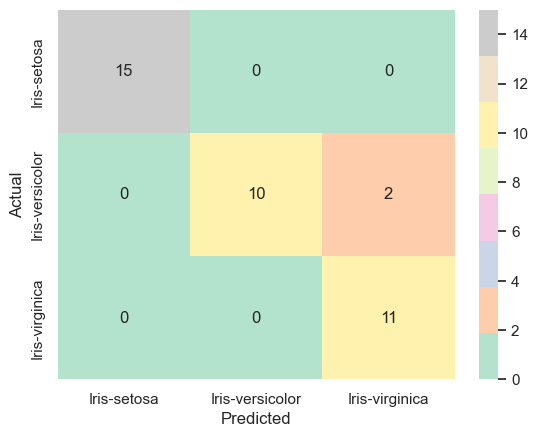

In [69]:
model_score=model.score(Xtest,ytest) #Accuracy of the model 
print(model_score)

cf_matrix=metrics.confusion_matrix(ytest,ypred) 
print(cf_matrix,ypred)

labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Pastel2', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Text(0, 0.5, 'Importance')

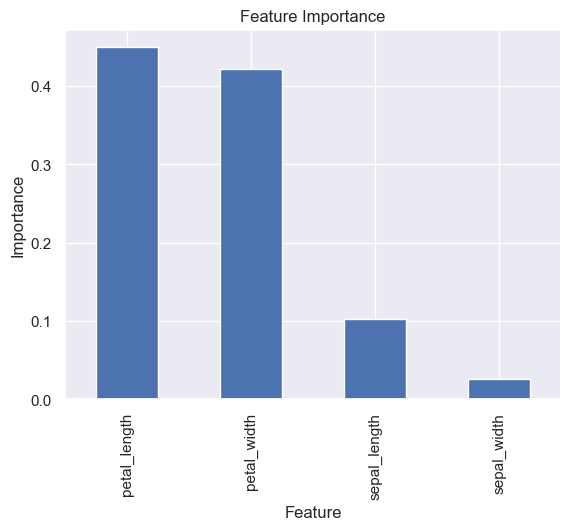

In [72]:
# To visualize the importance of each data
ax = feature_importances.plot(kind='bar')
ax.set_title("Feature Importance")
ax.set_xlabel("Feature")
ax.set_ylabel("Importance")

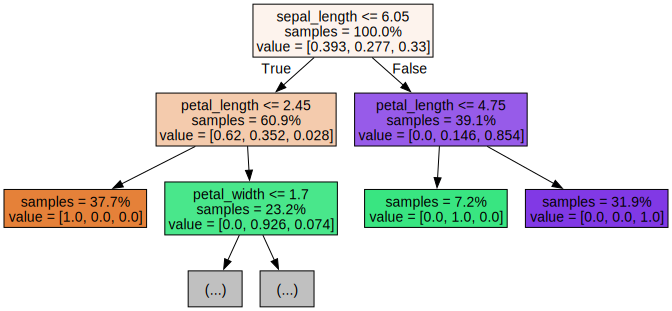

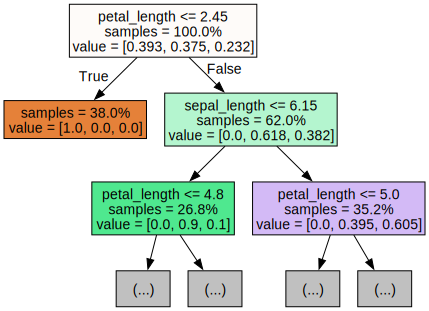

In [16]:
#Visualise the first 2 decision trees 

for i in range(2):
    tree = model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=Xtrain.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [73]:
#Saving the model

from joblib import dump
dump(model, 'model_flower.joblib')

['model_flower.joblib']